# New heading

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FREQ=5*60
FREQ

300

Il y a N point et l'intervalle entre chaque point est de T

In [3]:

# Number of sample points
N = 1000
Fe=800.
# sample spacing
T = 1.0 / Fe
T=FREQ
Fe=1.0/T

T correspond à la fréquence freq 

In [4]:
T

300

In [5]:
Fe

0.0033333333333333335

In [6]:
time=np.arange(start=0.0,stop=N*T,step=T)
time.shape

(1000,)

In [7]:
x = np.linspace(start=0.0, stop=N*T, num=N, endpoint=False)
x.shape

(1000,)

In [8]:
dates=pd.date_range(start='1/1/2018 23:10', periods=N, freq='5min')

In [9]:
duration=dates[1]-dates[0]


In [10]:
days, seconds = duration.days, duration.seconds

In [11]:
days

0

# Périodes

Notre base de travail, que nous appelons période, est une journée

In [12]:
PeriodeRef=3600*24 #seconde

Échantillons


In [13]:
Te=5*60 # seconde

Nombre de points sur 5 jour

In [14]:
Ne= 5*int(PeriodeRef/Te)
Ne

1440

On veut qu'il y ai trois cycle par jour, ce qui fait un total de 15 cycles sur 5 jours

In [15]:
CycleParPeriode=3


In [16]:
Fr=CycleParPeriode/PeriodeRef
Fr

3.472222222222222e-05

In [17]:
T=PeriodeRef/(Te*3)
T

96.0

In [18]:
ph=2.5

In [19]:
Retard=ph*(T*Te)/(2*np.pi)
Retard

11459.155902616465

https://zestedesavoir.com/tutoriels/2451/les-signaux-sinusoidaux-en-physique/dephasage-et-retard/

In [20]:
Dt=ph/(2*np.pi*Fr)
Dt

11459.155902616463

In [21]:
Fr*2*np.pi*time

array([ 0.        ,  0.06544985,  0.13089969,  0.19634954,  0.26179939,
        0.32724923,  0.39269908,  0.45814893,  0.52359878,  0.58904862,
        0.65449847,  0.71994832,  0.78539816,  0.85084801,  0.91629786,
        0.9817477 ,  1.04719755,  1.1126474 ,  1.17809725,  1.24354709,
        1.30899694,  1.37444679,  1.43989663,  1.50534648,  1.57079633,
        1.63624617,  1.70169602,  1.76714587,  1.83259571,  1.89804556,
        1.96349541,  2.02894526,  2.0943951 ,  2.15984495,  2.2252948 ,
        2.29074464,  2.35619449,  2.42164434,  2.48709418,  2.55254403,
        2.61799388,  2.68344372,  2.74889357,  2.81434342,  2.87979327,
        2.94524311,  3.01069296,  3.07614281,  3.14159265,  3.2070425 ,
        3.27249235,  3.33794219,  3.40339204,  3.46884189,  3.53429174,
        3.59974158,  3.66519143,  3.73064128,  3.79609112,  3.86154097,
        3.92699082,  3.99244066,  4.05789051,  4.12334036,  4.1887902 ,
        4.25424005,  4.3196899 ,  4.38513975,  4.45058959,  4.51

In [22]:
time=np.arange(Ne*Te,step=Te)
time[100]

30000

In [23]:
Retard=50

In [24]:
seasonality=np.sin(Fr*2*np.pi*time+Retard)
plt.plot(time,seasonality)

In [25]:
np.pi

3.141592653589793

Retard :99681.6901138162
reel : 6.263

Rest : 1.551
Div : -1
Estimation brutes -1.591

Estimation affiner: 6.263
Ecart : 1.7763568394002505e-15


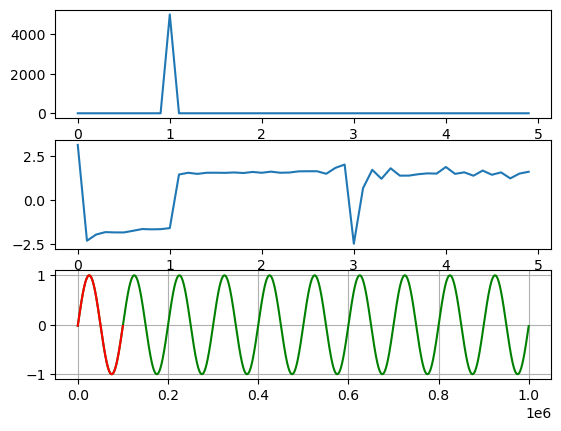

In [26]:
import numpy as np
import pylab as pl

num_t = 10000
End=1000000
t= np.linspace(0,End, num_t, endpoint=False)
Fr=0.00001
w = 2.0*np.pi*Fr
phase =2*np.pi-0.02
Delay=phase/(2*np.pi*Fr)
print('Retard :'+str(Delay))
dt = End/num_t
TT=int(1/(Fr*dt))#*dt
sig=np.sin(w*t+phase)
amp = np.fft.rfft(sig)#+np.pi/2
freqs = np.fft.rfftfreq(t.shape[-1],dt)
mag=np.sqrt(amp.real**2+amp.imag**2)
pha=np.arctan2(amp.imag,amp.real)
#pha[abs(mag)<1]=0
print('reel : '+str(np.around(phase,3))+'\n')
#PHA=max(abs(pha))
IndFR=np.argmax(mag)
Pe=np.pi
PHA=pha[IndFR]
PhaMod=PHA%Pe
PhaDiv=int(PHA//Pe)
print("Rest : "+str(np.around(PhaMod,3)))
print("Div : "+str(PhaDiv))
print('Estimation brutes '+str(np.around(PHA,3))+'\n')
#print(PHA>np.pi/2)
'''if((PHA>np.pi+0.001) or (PHA<0)):
    print(">")
    PHA=PHA+np.pi'''
PHA=PhaMod+abs(PhaDiv)*np.pi+np.pi/2
#print (PHA)
print('Estimation affiner: '+str(np.around(PHA,3)))
print('Ecart : '+str(PHA-phase))
pl.subplot(311)
pl.plot(freqs[:50],np.sqrt(amp.real**2+amp.imag**2)[:50])
pl.subplot(312)
pl.plot(freqs[:50],(pha)[:50])
pl.subplot(313)
pl.plot(t,sig,'g')
pl.plot(t[:TT],sig[:TT],'r')
pl.grid()
pl.show()

In [27]:
TT=1/Fr*dt
TT

9999999.999999998

In [28]:
Lambda=1/(Fr*60*5)
Lambda

333.3333333333333

In [29]:
dates2=pd.date_range(start='1/1/2018 23:10', periods=Ne, freq='5min')


In [30]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates2
dfs.plot()
dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

NameError: name 'Periode' is not defined

# Test

In [ ]:
Fr=CycleParJour/(24*3600)
Fr

phase = np.pi / 24
phase

In [ ]:
periode

In [ ]:
periode=60#24*3600#max(2.0*np.pi*x)
phase=periode/3#*(3600*24)
phase=20/(24*3600)
phase

In [ ]:
seasonality=1* np.sin(Fr*2.0*np.pi*x+phase)


In [ ]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates
dfs.plot()
dfs[0:60].plot()

# Fin

In [31]:
Fe=1/Te

In [32]:
f, Pxx_den = signal.periodogram(dfs.values[:,0],Fe)

In [33]:
plt.plot(f,Pxx_den)
plt.xlim([0,0.0001])
plt.scatter([Fr],[0])

In [34]:
from scipy.fft import fft, fftfreq, fftshift

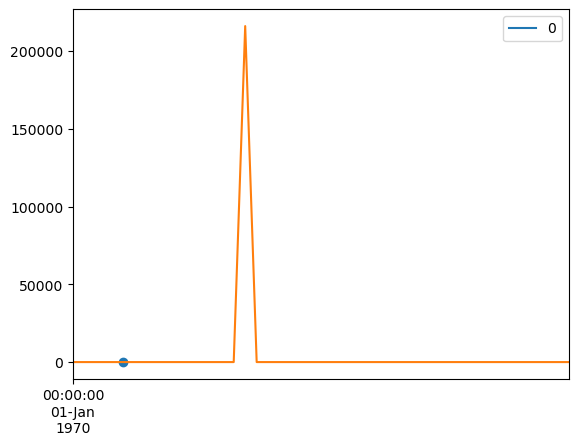

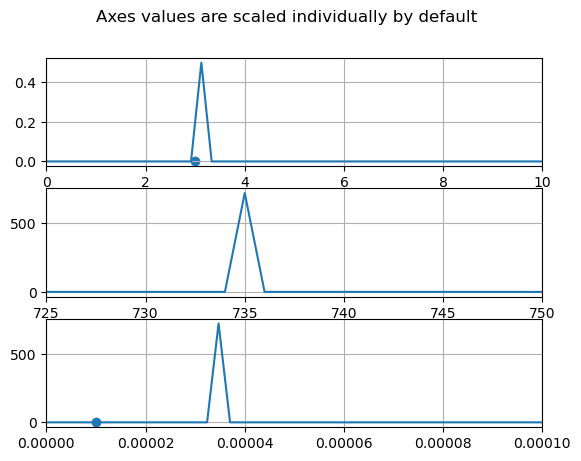

In [35]:
yf = fft(dfs.values[:,0])

xf = fftfreq(Ne,Fe)

xc = fftshift(fftfreq(Ne,Fe))
xfr = fftshift(fftfreq(Ne,Te))

yplot = fftshift(yf)

import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.suptitle('Axes values are scaled individually by default')

ax1.plot(xc, 1.0/Ne * np.abs(yplot))
ax1.set_xlim([0,10])
ax1.grid()
ax1.scatter([3],[0])
ax2.plot(np.abs(yplot))#xfr
#
#ax2.set_xlim([0,0.0001])
#
ax2.set_xlim([725,750])
ax2.grid()
#
ax3.scatter([Fr],[0])
ax3.plot(xfr,np.abs(yplot))#xfr
#
#
ax3.set_xlim([0,0.0001])
#ax2.set_xlim([725,750])
ax3.grid()
#ax2.scatter([Fr],[0])
plt.show()

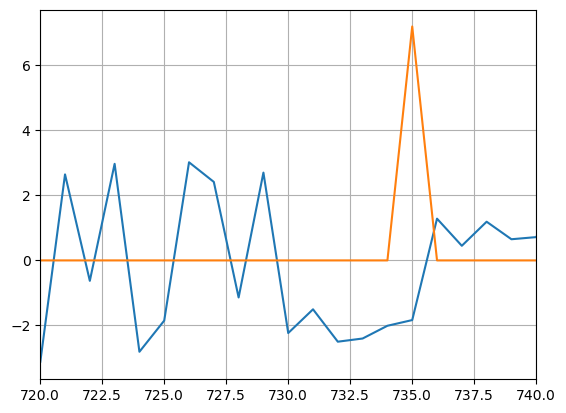

In [36]:
plt.plot(np.angle(yplot))
plt.plot(1/100*np.abs(yplot))
plt.xlim([720,740])
plt.grid()
plt.show()

In [37]:
ph

2.5

In [38]:
PH=np.angle(yplot[735])#490
PH

-1.8362787842315882

In [39]:
Ret=PH*Lambda/(2*np.pi)
Ret

-97.41761513507772

In [40]:
M=np.pi+PH
M

1.305313869358205

In [41]:
Lambda

333.3333333333333

In [42]:
np.abs(PH)*(Periode/(5*60))/(Lambda)

NameError: name 'Periode' is not defined

In [43]:
PH*3/(2*np.pi)

-0.8767585362156995

In [44]:
ret=20*Te
ret

6000

In [45]:
seasonality=np.sin(Fr*2*np.pi*(time+ret))
plt.plot(time,seasonality)

In [46]:
seasonalityRef=np.sin(Fr*2*np.pi*time)
seasonalityRef.shape

(1440,)

In [47]:
Cor=np.correlate(seasonalityRef, seasonality,"full")

In [48]:
NC=Cor.shape[0]
NC

2879

In [49]:
plt.plot(time[:2*20],Cor[int(NC/2):int(NC/2)+2*20],'r')

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

phase = np.pi / 4
print(phase)
t = np.linspace(0, 10, num=200, endpoint=False)
y = np.cos(2 * np.pi * t + phase)

0.7853981633974483


In [51]:
phase=1.2
phase

1.2

In [52]:
seasonality=np.sin(Fr*2*np.pi*time+phase)
plt.plot(time,seasonality)

In [53]:
1/Fr

99999.99999999999

In [54]:
seasonalityPeriode=seasonality[0:int(T)]

In [55]:
plt.plot(time[0:int(T)],seasonalityPeriode)
plt.grid()

In [56]:
Overtime=np.arange(Ne*Te,step=Te/100)


In [57]:
seasonalityI=np.interp(Overtime,time, seasonality)

In [58]:
plt.plot(seasonalityI)
plt.grid()

In [59]:
from scipy import signal 
hamming = signal.hamming(seasonalityI.shape[0])

In [60]:
seasonalityI=seasonalityI*hamming

1.2
35877.29445913876


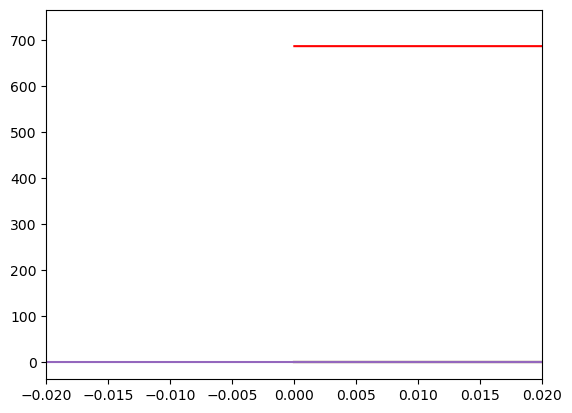

In [61]:
Y = scipy.fftpack.fftshift(scipy.fftpack.fft(seasonalityI))
f = scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(seasonalityI)))
print(phase)
p = np.angle(Y)
print(max(np.abs(Y)))
#p=p*T
p[np.abs(Y) < 38000] = 0
plt.plot(f, p)
plt.xlim([-0.02,0.02])
plt.show()

In [62]:
phase=np.arctan2(np.imag(Y),np.real(Y)) 
phase[np.abs(Y) < 47] = 0
plt.plot(f,phase)

https://stackoverflow.com/questions/54454723/scipy-fft-how-to-get-phase-angle/54466750

In [63]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [64]:
find_nearest(xfr,Fr)

724

In [65]:
Fr

1e-05

In [66]:
np.abs(yplot[3])

9.259480112077862e-14

In [67]:
np.arctan(np.angle(yplot[3],deg=True))

-1.5624009511836068

In [68]:
Ns=seasonality.shape[0]
Ns

1440

In [69]:
import numpy as np
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma,Ns)
plt.plot(y)
N

1000

In [70]:
 
import pandas as pd
df = pd.DataFrame(Data[:, np.newaxis])
#df.index = dates2

NameError: name 'Data' is not defined

In [71]:
trend = 0.00000
8

8

In [72]:
trend=0.000002*time+3
#seasonality=4 + 2 * np.sin(200 * x)
x.shape
plt.plot(trend)

Fréquence neterme de minutes

In [73]:
Data=trend+seasonality+0.3*y

In [74]:

import pandas as pd
df = pd.DataFrame(Data[:, np.newaxis])
#df.index = dates2

In [75]:
df.plot()

<AxesSubplot:>

In [76]:
df.to_csv('Simulated.csv')

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [78]:
model = ARIMA(y, order=(2,0,2))
model_fit = model.fit()

In [79]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2020.084
Date:                Mon, 06 Feb 2023   AIC                           4052.168
Time:                        16:16:24   BIC                           4083.802
Sample:                             0   HQIC                          4063.977
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0451      0.104     -0.435      0.664      -0.248       0.158
ar.L1          0.6583      0.063     10.480      0.000       0.535       0.781
ar.L2         -0.1999      0.050     -3.961      0.000      -0.299      -0.101
ma.L1          0.7389      0.059     12.593      0.000       0.624       0.854
ma.L2          0.4094      0.041      9.987      0.000       0.329       0.490
sigma2         0.9669      0.035     27.662      0.000       0.898       1.035
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.45
Prob(Q):                              1.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.95   Skew:                             0.14
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Magnitude: 89.90818804706949 , phase: -0.26153274487452727


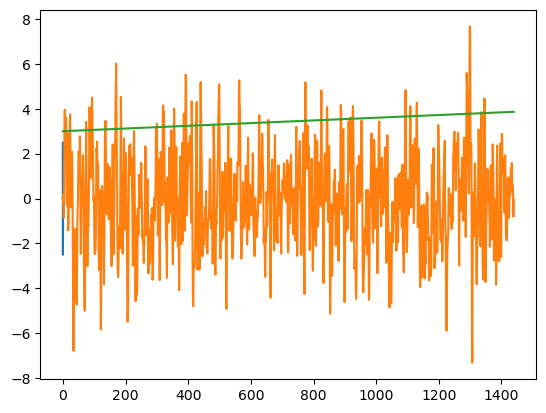

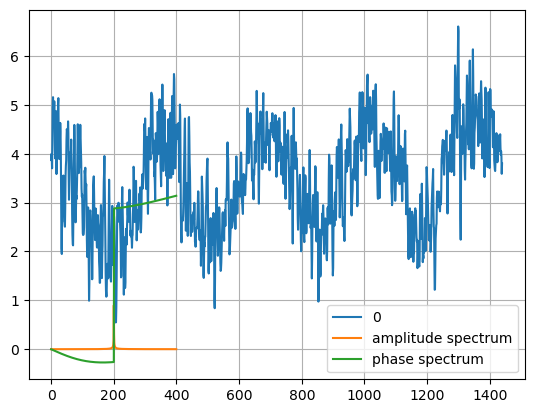

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points
N = 1000

# Sample spacing
T = 1.0 / 800.0     # f = 800 Hz

# Create a signal
x = np.linspace(0.0, N*T, N)
t0 = np.pi/6   # non-zero phase of the second sine
y = np.sin(200.0 * 2.0*np.pi*x + t0)
yf = np.fft.fft(y) # to normalize use norm='ortho' as an additional argument

# Where is a 200 Hz frequency in the results?
freq = np.fft.fftfreq(x.size, d=T)
index, = np.where(np.isclose(freq, 200, atol=1/(T*N)))

# Get magnitude and phase
magnitude = np.abs(yf[index[0]])
phase = np.angle(yf[index[0]])
print("Magnitude:", magnitude, ", phase:", phase)

# Plot a spectrum 
plt.plot(freq[0:N//2], 2/N*np.abs(yf[0:N//2]), label='amplitude spectrum')   # in a conventional form
plt.plot(freq[0:N//2], np.angle(yf[0:N//2]), label='phase spectrum')
plt.legend()
plt.grid()
plt.show()

0.7853981633974483


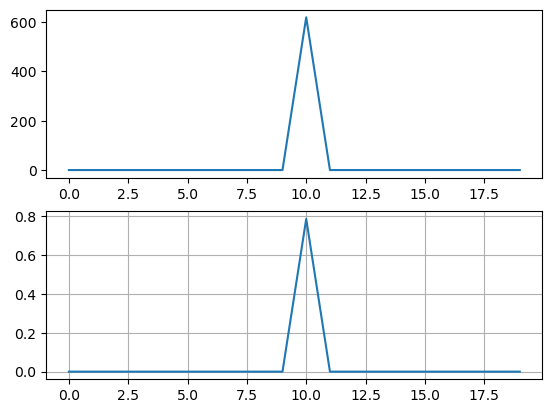

In [81]:
import numpy as np
import pylab as pl

num_t = 1238
t= np.linspace(0, 1, num_t, endpoint=False)
w = 2.0*np.pi*10
phase =np.pi/4
dt = 1.0/num_t
amp = np.fft.rfft(np.cos(w*t+phase))
freqs = np.fft.rfftfreq(t.shape[-1],dt)
mag=np.sqrt(amp.real**2+amp.imag**2)
pha=np.arctan2(amp.imag,amp.real)
pha[mag<1]=0
print(phase)
pl.subplot(211)
pl.plot(freqs[:20],np.sqrt(amp.real**2+amp.imag**2)[:20])
pl.subplot(212)
pl.plot(freqs[:20],(pha)[:20])
pl.grid()
pl.show()



In [ ]:
Fr

In [ ]:
import numpy as np
import pylab as pl

num_t = 1000
End=100000
t= np.linspace(0,End, num_t, endpoint=False)
Fr=0.00001
w = 2.0*np.pi*Fr
phase =np.pi/4
Delay=phase/(2*np.pi*Fr)
print(Delay)
dt = End/num_t
amp = np.fft.rfft(np.cos(w*t+phase))
freqs = np.fft.rfftfreq(t.shape[-1],dt)
mag=np.sqrt(amp.real**2+amp.imag**2)
pha=np.arctan2(amp.imag,amp.real)
pha[abs(mag)<1]=0
print(phase)
PHA=max(pha)
print(PHA)
if(PHA<0):
    PHA=PHA+2*np.pi
print(PHA)
pl.subplot(311)
pl.plot(freqs[:10],np.sqrt(amp.real**2+amp.imag**2)[:10])
pl.subplot(312)
pl.plot(freqs[:10],(pha)[:10])
pl.subplot(313)
pl.plot(t,np.cos(w*t+phase))
pl.grid()
pl.show()



In [ ]:
phase

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 1Hz sine wave
npts  = 100
tmax  = 10                          
t     = np.linspace(0, tmax, npts,endpoint=False)
y     = np.sin(2*np.pi*2*t)
dt    = tmax/npts

# FFT computation
Y      = fft(y)
freq   = fftfreq(npts, d=dt)
amplit = abs(Y)/npts
phase  = np.angle(Y)
phase  = phase / np.pi

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(freq, amplit)
ax[1].plot(freq, phase)

ax[0].plot([2,2], [0,0.5], '--')
ax[0].plot([-2,-2], [0,0.5], '--')
ax[1].plot([2,2], [-1,1], '--')
ax[1].plot([-2,-2], [-1,1], '--')


# Lien

In [ ]:
Data2=4*Data+2
plt.plot(Data2)

In [ ]:
import warnings

z = np.polyfit(Data,Data2,1)
z

In [ ]:
p = np.poly1d(z)
plt.plot(time,p(time))